In [10]:
import pandas as pd

df = pd.read_csv("dataset-modified.csv", index_col=0)
train_df = pd.read_csv("train.csv", index_col=0)
test_df = pd.read_csv("test.csv", index_col=0)
validation_df = pd.read_csv("validation.csv", index_col=0)

# full dataset
X = df.drop("Class", axis=1)
y = df["Class"]

# splits
X_train = train_df.drop("Class", axis=1)
y_train = train_df["Class"]
X_validation = validation_df.drop("Class", axis=1)
y_validation = validation_df["Class"]
X_test = test_df.drop("Class", axis=1)
y_test = test_df["Class"]

## find optimal k with uniform weights

0.8572158365261815 0.02630782771817877
0.9116085896445717 0.027035433758939905
The worst number of neighbors: 1, value: 0.778
The optimal number of neighbors: 12, value: 0.881
The optimal number of neighbors based on AUC: 28, value: 0.928


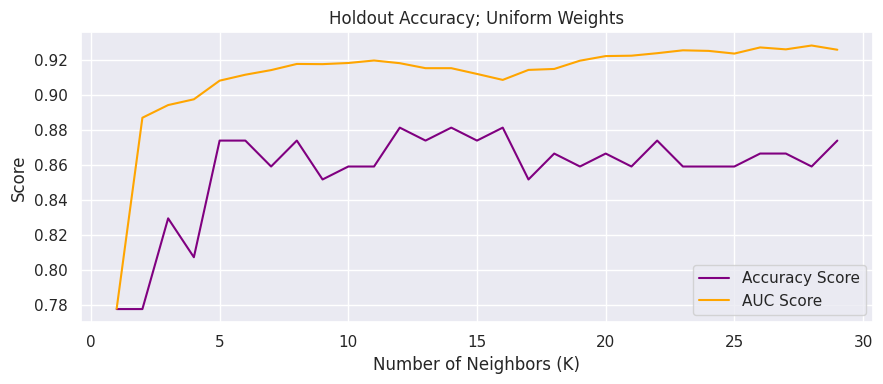

In [11]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


def find_optimal_parameters_holdout(weights: str, max_k: int = 30):
    acc_scores = []
    auc_scores = []

    for k in range(1, max_k):
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_validation)
        y_pred_prob = knn.predict_proba(X_validation)[:, 1]

        acc_scores.append(accuracy_score(y_validation, y_pred))
        auc_scores.append(roc_auc_score(y_validation, y_pred_prob))

    return acc_scores, auc_scores


max_k = 30
acc_scores, auc_scores = find_optimal_parameters_holdout(weights="uniform", max_k=30)
worst_k = min(acc_scores)
worst_k_index = acc_scores.index(worst_k) + 1
optimal_k = max(acc_scores)
optimal_k_index = acc_scores.index(optimal_k) + 1
optimal_k_auc = max(auc_scores)
optimal_k_auc_index = auc_scores.index(optimal_k_auc) + 1

print(np.mean(acc_scores), np.std(acc_scores))
print(np.mean(auc_scores), np.std(auc_scores))
print(f"The worst number of neighbors: {worst_k_index}, value: {worst_k:.3f}")
print(f"The optimal number of neighbors: {optimal_k_index}, value: {optimal_k:.3f}")
print(f"The optimal number of neighbors based on AUC: {optimal_k_auc_index}, value: {optimal_k_auc:.3f}")

plt.figure(figsize=(9, 4))
plt.plot(range(1, max_k), acc_scores, color="purple", label="Accuracy Score")
plt.plot(range(1, max_k), auc_scores, color="orange", label="AUC Score")
plt.title("Holdout Accuracy; Uniform Weights")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()

## find optimal k with distance based weights

0.8464878671775226 0.020760486105967924
0.9132403495222087 0.027791435084813954
The worst number of neighbors: 1, value: 0.778
The optimal number of neighbors: 6, value: 0.867
The optimal number of neighbors based on AUC: 28, value: 0.928


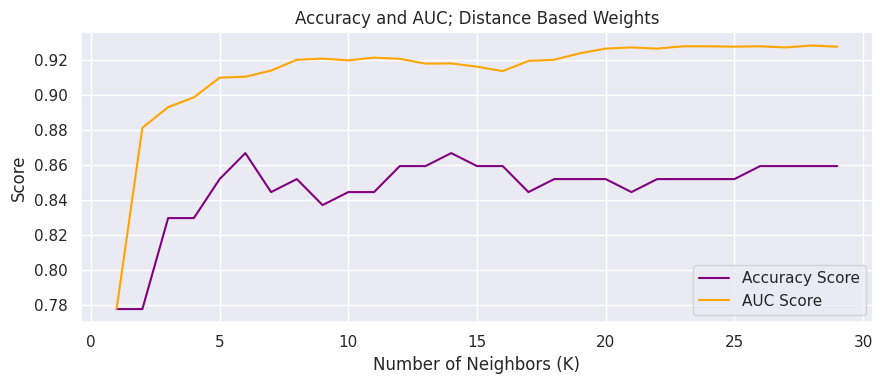

In [12]:
max_k = 30
acc_scores, auc_scores = find_optimal_parameters_holdout(weights="distance", max_k=30)
worst_k = min(acc_scores)
worst_k_index = acc_scores.index(worst_k) + 1
optimal_k = max(acc_scores)
optimal_k_index = acc_scores.index(optimal_k) + 1
optimal_k_auc = max(auc_scores)
optimal_k_auc_index = auc_scores.index(optimal_k_auc) + 1

print(np.mean(acc_scores), np.std(acc_scores))
print(np.mean(auc_scores), np.std(auc_scores))
print(f"The worst number of neighbors: {worst_k_index}, value: {worst_k:.3f}")
print(f"The optimal number of neighbors: {optimal_k_index}, value: {optimal_k:.3f}")
print(f"The optimal number of neighbors based on AUC: {optimal_k_auc_index}, value: {optimal_k_auc:.3f}")

plt.figure(figsize=(9, 4))
plt.plot(range(1, max_k), acc_scores, color="purple", label="Accuracy Score")
plt.plot(range(1, max_k), auc_scores, color="orange", label="AUC Score")
plt.title("Accuracy and AUC; Distance Based Weights")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()

## find confidence matrices and score table

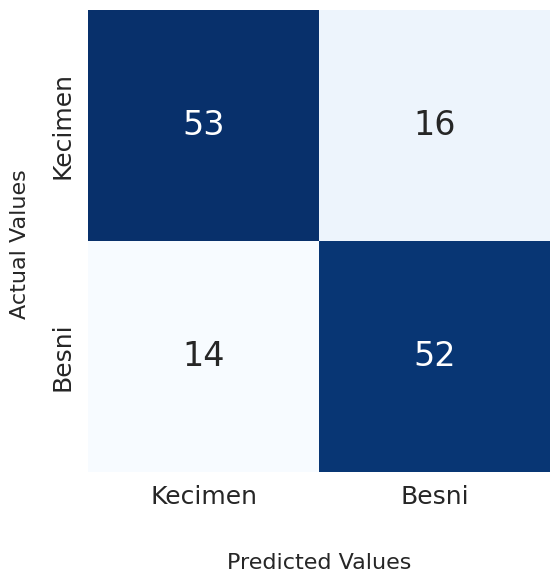

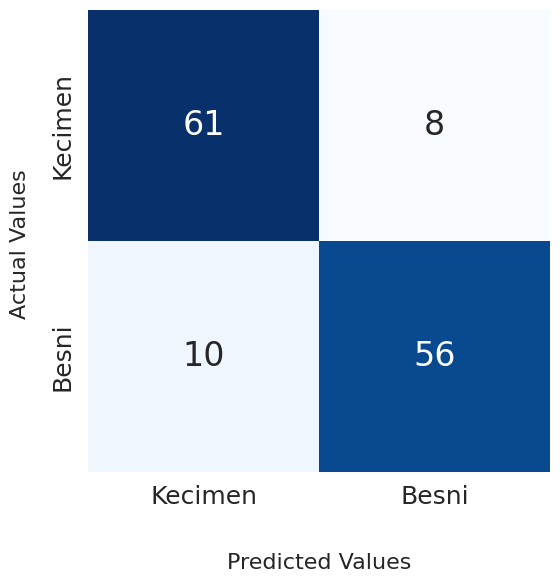

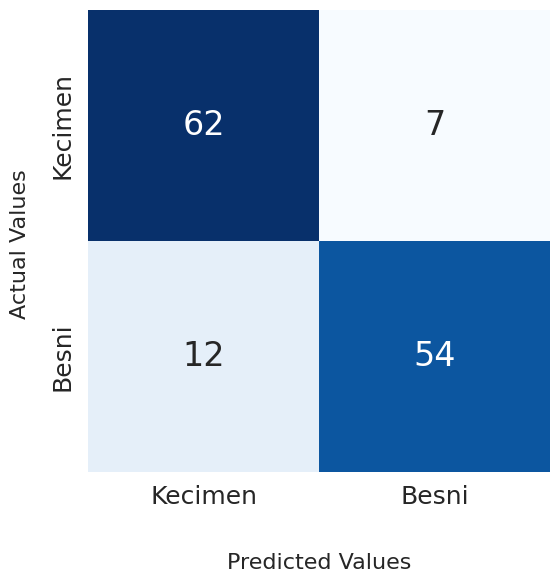

,K,Accuracy,AUC,Precision,Recall,F1 Score
0,2,0.777778,0.881094,0.791045,0.768116,0.779412
1,6,0.866667,0.910189,0.859155,0.884058,0.871429
2,28,0.859259,0.927975,0.837838,0.898551,0.867133


In [13]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


def get_result_stats(clf, X, y, pos_label="Kecimen"):
    y_pred = clf.predict(X)
    y_prob = clf.predict_proba(X)[:, 1]

    conf_matrix = confusion_matrix(y, y_pred, labels=["Kecimen", "Besni"])
    acc = accuracy_score(y, y_pred)
    auc_score = roc_auc_score(y, y_prob)
    precision = precision_score(y, y_pred, pos_label=pos_label)
    recall = recall_score(y, y_pred, pos_label=pos_label)
    f1 = f1_score(y, y_pred, pos_label=pos_label)

    return y_pred, acc, auc_score, precision, recall, f1, conf_matrix


def display_conf_matrix(conf_matrix):
    sns.set(font_scale=2)
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues', cbar=False, square=True, fmt='g')
    ax.set_xlabel('\nPredicted Values', fontsize=16)
    ax.set_ylabel('Actual Values ', fontsize=16)
    ax.xaxis.set_ticklabels(['Kecimen', 'Besni'], fontsize=18)
    ax.yaxis.set_ticklabels(['Kecimen', 'Besni'], fontsize=18)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    plt.show()
    sns.set()


results = []
wrong_predictions = set()
for val in [2, 6, 28]:
    clf = KNeighborsClassifier(n_neighbors=val, weights="distance").fit(X_train, y_train)
    y_pred, acc, auc_score, precision, recall, f1, conf_matrix = get_result_stats(clf, X_validation, y_validation)
    results.append([val, acc, auc_score, precision, recall, f1])

    display_conf_matrix(conf_matrix=conf_matrix)

    if val != 2:
        for i, (item_index, actual) in enumerate(y_validation.items()):
            predicted = y_pred[i]
            if actual != predicted:
                wrong_predictions.add(item_index)

columns = ["K", "Accuracy", "AUC", "Precision", "Recall", "F1 Score"]
results_df = pd.DataFrame(results, columns=columns)
results_df.to_latex(
    "./knn-scores.tex",
    float_format="%.3f",
    caption="Apskaičiuoti matai",
    label="tab:knn-scores",
    index=False,
    escape=True,
    bold_rows=True,
)

display(results_df)


## classification result scatter plot

only knn with distance based weights is used later as it gave better results

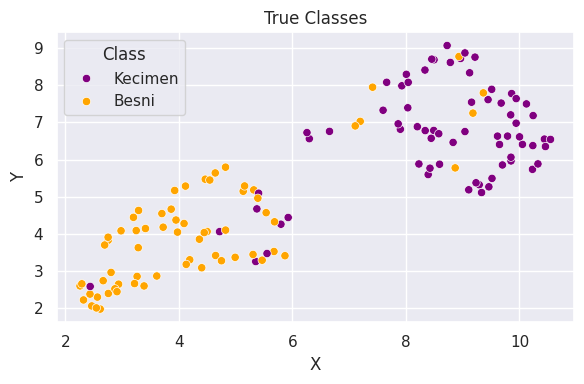

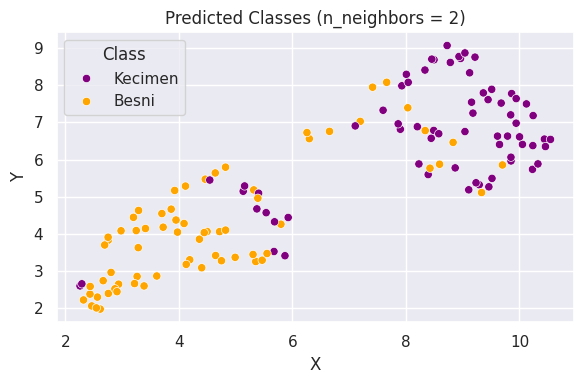

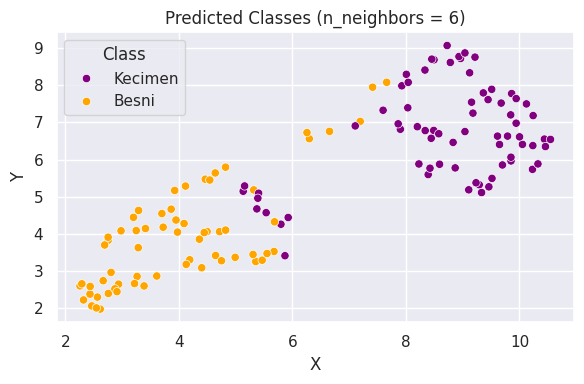

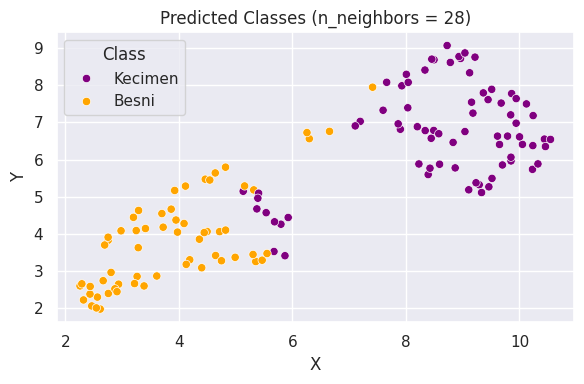

In [14]:
import umap


def plot_classes_scatterplot(n_neighbors: int, class_colors=None):
    if class_colors is None:
        class_colors = {"Kecimen": "purple", "Besni": "orange"}

    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights="distance").fit(X_train, y_train)
    y_validation_pred = knn.predict(X_validation)

    umap_reducer = umap.UMAP(n_neighbors=20, random_state=42, n_jobs=1)
    X_validation_umap = umap_reducer.fit_transform(X_validation)

    df_pred = pd.DataFrame(
        data={
            "UMAP1": X_validation_umap[:, 0],
            "UMAP2": X_validation_umap[:, 1],
            "Class": y_validation_pred,
        }
    )

    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        data=df_pred, x="UMAP1", y="UMAP2", hue="Class", palette=class_colors
    )
    plt.title(f"Predicted Classes (n_neighbors = {n_neighbors})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(title="Class", loc="upper left")
    plt.tight_layout()
    plt.show()


umap_reducer = umap.UMAP(n_neighbors=20, random_state=42, n_jobs=1)
X_validation_umap = umap_reducer.fit_transform(X_validation)

plt.figure(figsize=(6, 4))
class_colors = {"Kecimen": "purple", "Besni": "orange"}
df_true = pd.DataFrame(
    data={"UMAP1": X_validation_umap[:, 0], "UMAP2": X_validation_umap[:, 1], "Class": y_validation}
)
sns.scatterplot(
    data=df_true, x="UMAP1", y="UMAP2", hue="Class", palette=class_colors
)
plt.title("True Classes")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(title="Class", loc="upper left")
plt.tight_layout()
plt.show()

for n in [2, 6, 28]:
    plot_classes_scatterplot(n_neighbors=n)



## stat tables for mistakes

In [15]:
def display_stats_tables_by_class(df: pd.DataFrame, label: str):
    rename_map = {
        "mean": "Mean",
        "std": "Std",
        "min": "Min",
        "50%": "Med",
        "25%": "1Q",
        "75%": "3Q",
        "max": "Max",
        "count": "Count",
    }

    for cn in ["Kecimen", "Besni"]:
        stat_df = df.loc[df["Class"] == cn].describe().T.rename(columns=rename_map).T

        stat_df.to_latex(
            f"./{label}-{cn.lower()}-knn.tex",
            float_format="%.3f",
            caption=f"{cn} klaidingai priskirtų razinų aprašomoji statistika",
            label=f"tab:knn-{label}-{cn.lower()}",
            escape=True,
            bold_rows=True,
        )

        print(f"{cn} klaidingai priskirtų razinų aprašomoji statistika")
        display(stat_df)


display_stats_tables_by_class(
    df=validation_df.loc[list(wrong_predictions)], label="stat-wrong"
)

Kecimen klaidingai priskirtų razinų aprašomoji statistika


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Perimeter
Count,8.000000,8.000000,8.000000,8.000000,8.000000
Mean,0.305399,0.307611,0.330085,0.758342,0.312956
Std,0.113309,0.137809,0.125344,0.119260,0.164707
Min,0.173638,0.226619,0.154900,0.570697,0.195814
1Q,0.232761,0.243346,0.241000,0.683226,0.242970
Med,0.282686,0.267784,0.318966,0.800482,0.258919
3Q,0.345217,0.281916,0.437516,0.834591,0.296348
Max,0.529204,0.644355,0.480917,0.902779,0.711600


Besni klaidingai priskirtų razinų aprašomoji statistika


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Perimeter
Count,13.000000,13.000000,13.000000,13.000000,13.000000
Mean,0.232763,0.209831,0.297486,0.668355,0.228309
Std,0.079723,0.056261,0.112922,0.149464,0.055107
Min,0.105991,0.123129,0.116197,0.248227,0.122682
1Q,0.173967,0.155915,0.232002,0.661499,0.213860
Med,0.283254,0.221808,0.307495,0.704743,0.259154
3Q,0.292512,0.252340,0.345383,0.762514,0.266604
Max,0.324592,0.278418,0.518101,0.787579,0.284078


## estimate classification using several methods

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

results = []

clf = KNeighborsClassifier(n_neighbors=28, weights="distance")
clf.fit(X_train, y_train)
_, acc, auc_score, precision, recall, f1, _ = get_result_stats(clf, X_test, y_test)
results.append(["Holdout", acc, auc_score, precision, recall, f1])

clf = KNeighborsClassifier(n_neighbors=28, weights="distance")
cv_results = []
for metric in ['accuracy', 'roc_auc', 'precision_macro', 'recall_macro', 'f1_macro']:
    scores = cross_val_score(clf, X, y, scoring=metric, cv=10)
    cv_results.append(scores.mean())
results.append(["Cross-Validation"] + cv_results)

clf = KNeighborsClassifier(n_neighbors=28, weights="distance").fit(X_train, y_train)
bagging_clf = BaggingClassifier(estimator=clf, n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
_, acc, auc_score, precision, recall, f1, _ = get_result_stats(bagging_clf, X_test, y_test)
results.append(["Bagging", acc, auc_score, precision, recall, f1])

columns = ["Strategy", "Accuracy", "AUC", "Precision", "Recall", "F1 Score"]
results_df = pd.DataFrame(results, columns=columns)
display(results_df)
results_df.to_latex(
    "./knn-strategy-scores.tex",
    float_format="%.3f",
    caption="Apskaičiuoti skirtingų strategijų matai",
    label="tab:knn-strategy-scores",
    index=False,
    escape=True,
    bold_rows=True,
)

,Strategy,Accuracy,AUC,Precision,Recall,F1 Score
0,Holdout,0.837037,0.905644,0.867647,0.819444,0.842857
1,Cross-Validation,0.853333,0.913210,0.857746,0.853333,0.852723
2,Bagging,0.837037,0.902998,0.857143,0.833333,0.845070
